In [ ]:
from konlpy.tag import Kkma

kkma = Kkma()

text = "아버지가 방에 들어갑니다."

morphs = kkma.morphs(text)
print(morphs)

pos = kkma.pos(text)
print(pos)

nouns = kkma.nouns(text)
print(nouns)

sentences = "오늘 날씨는 어때요? 내일은 덥다던데."
s = kkma.sentences(sentences)
print(s)

In [ ]:
from konlpy.tag import Komoran

komoran = Komoran()

text = "아버지가 방에 들어갑니다."

morphs = komoran.morphs(text)
print(morphs)

pos = komoran.pos(text)
print(pos)

nouns = komoran.nouns(text)
print(nouns)

In [ ]:
from konlpy.tag import Okt

okt = Okt()

text = "서울의 기온은 매우 낮을 것입니다."

morphs = okt.morphs(text)
print(morphs)

pos = okt.pos(text)
print(pos)

nouns = okt.nouns(text)
print(nouns)

text = "와... 개쩐닼ㅋㅋㅋㅋ"
print(okt.normalize(text))
print(okt.phrases(text))

In [ ]:
from konlpy.tag import Komoran

komoran = Komoran(userdic='./user_dic.tsv')
text = "우리 챗봇은 엔엘피를 좋아해"
pos = komoran.pos(text)
print(pos)

In [ ]:
from konlpy.tag import Komoran
import numpy as np

komoran = Komoran()
text = "오늘 날씨는 구름이 많아요."

nouns = komoran.nouns(text)
print(nouns)

dics = {}
for word in nouns:
    if word not in dics.keys():
        dics[word] = len(dics)
print(dics)

nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

In [6]:
from gensim.models import Word2Vec
from konlpy.tag import Komoran
import time

def read_review_data(filename):
    with open(filename, 'r', encoding="UTF8") as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

start = time.time()

print('1) 말뭉치 데이터 읽기 시작')
review_data = read_review_data('./ratings.txt')
print(len(review_data))
print('1) 말뭉치 데이터 읽기 완료 : ', time.time() - start)


print('2) 형태소에서 명사만 추출 시작')
komoran = Komoran()
docs = [komoran.nouns(sentence[1]) for sentence in review_data]
print('2) 형태소에서 명사만 추출 완료 : ', time.time() - start)

print('3) Word2Vec 모델 학습 시작')
model = Word2Vec(sentences=docs, size=200, window=4, hs=1, min_count=2, sg=1)
print('3) Word2Vec 모델 학습 완료 : ', time.time() - start)

print('4) 학습된 모델 저장 시작')
model.save('nvmc.model')
print('4) 학습된 모델 저장 완료 : ', time.time() - start)

print("corpus_count : ", model.corpus_count)
print("corpus_total_words : ", model.corpus_total_words)

1) 말뭉치 데이터 읽기 시작
200000
1) 말뭉치 데이터 읽기 완료 :  1.673100471496582
2) 형태소에서 명사만 추출 시작
2) 형태소에서 명사만 추출 완료 :  87.36483502388
3) Word2Vec 모델 학습 시작
3) Word2Vec 모델 학습 완료 :  105.85037922859192
4) 학습된 모델 저장 시작
4) 학습된 모델 저장 완료 :  106.3192617893219
corpus_count :  200000
corpus_total_words :  1076896


In [1]:
from gensim.models import Word2Vec

model = Word2Vec.load('nvmc.model')
print("corpus_total_words : ", model.corpus_total_words)

print('사랑 : ', model.wv['사랑'])

print("일요일 = 월요일\t", model.wv.similarity(w1='일요일', w2='월요일'))
print("안성기 = 배우\t", model.wv.similarity(w1='안성기', w2='배우'))
print("대기업 = 삼성\t", model.wv.similarity(w1='대기업', w2='삼성'))
print("일요일 != 삼성\t", model.wv.similarity(w1='일요일', w2='삼성'))
print("히어로 != 삼성\t", model.wv.similarity(w1='히어로', w2='삼성'))

print(model.wv.most_similar("안성기", topn=8))
print(model.wv.most_similar("시리즈", topn=8))

corpus_total_words :  1076896
사랑 :  [-2.18901098e-01 -2.30638266e-01 -3.23516726e-01 -1.10880509e-01
 -5.24657145e-02 -3.67247373e-01  2.49535859e-01 -1.10672571e-01
 -1.19900972e-01  5.35115078e-02 -4.20753807e-02 -1.63022757e-01
  3.10032796e-02  5.87000251e-02  1.80825457e-01 -9.81938988e-02
  1.56695947e-01  2.77327865e-01 -1.71590030e-01 -3.21360171e-01
 -1.89659074e-02  3.14504564e-01  1.14165783e-01 -9.37822089e-02
 -4.89308462e-02  1.42771974e-01  4.87611175e-01  2.64883310e-01
  1.31326869e-01  6.54022321e-02 -5.31798825e-02  1.06777422e-01
 -3.57340509e-03  8.59801546e-02  2.35606715e-01 -1.58076987e-01
 -1.03374198e-02  1.60184503e-01 -5.67743219e-02 -1.14387959e-01
  8.48006904e-02  1.62630752e-02  3.73258680e-01 -2.13345257e-03
  1.42463073e-01 -3.05327505e-01 -4.06463087e-01 -9.46389064e-02
  4.32475582e-02 -5.02498925e-01 -8.24670717e-02 -8.22420120e-02
 -1.53637022e-01  2.26479188e-01 -4.69100446e-01  4.85097691e-02
  4.71878827e-01  1.51207283e-01  3.23728085e-01  1.01

In [6]:
from konlpy.tag import Komoran

def word_ngram(bow, num_gram):
    text = tuple(bow)
    ngrams = [text[x:x + num_gram] for x in range(0, len(text))]
    return tuple(ngrams)

def similarity(doc1, doc2):
    cnt = 0
    for token in doc1:
        if token in doc2:
            cnt = cnt + 1
        return cnt/len(doc1)

sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

doc1 = word_ngram(bow1, 2)
doc2 = word_ngram(bow2, 2)
doc3 = word_ngram(bow3, 2)

print(doc1)
print(doc2)

r1 = similarity(doc1, doc2)
r2 = similarity(doc3, doc1)

print(r1)
print(r2)

(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '트리니티'), ('트리니티', '입학'), ('입학',))
(('6월', '뉴턴'), ('뉴턴', '선생님'), ('선생님', '제안'), ('제안', '대학교'), ('대학교', '입학'), ('입학',))
0.16666666666666666
0.16666666666666666


In [1]:
from konlpy.tag import Komoran
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def make_term_doc_mat(sentence_bow, word_dics):
    freq_mat = {}
    
    for word in word_dics:
        freq_mat[word] = 0
        
    for word in word_dics:
        if word in sentence_bow:
            freq_mat[word] += 1
    
    return freq_mat

def make_vector(tdm):
    vec = []
    for key in tdm:
        vec.append(tdm[key])
    return vec

sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었다.'

komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

bow = bow1 + bow2 + bow3

word_dics = []
for token in bow:
    if token not in word_dics:
        word_dics.append(token)

freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)
print(freq_list1)
print(freq_list2)
print(freq_list3)

doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))

r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)
print(r1)
print(r2)

{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 1, '입학': 1, '대학교': 0, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 0, '입학': 1, '대학교': 1, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 0, '뉴턴': 1, '선생님': 0, '제안': 0, '트리니티': 0, '입학': 0, '대학교': 0, '밥': 1, '선생': 1, '님과 함께': 1}
0.8333333333333335
0.20412414523193154


In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7)
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

#신경망 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#생선한 신경망을 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

print('모델 평가')
model.evaluate(x_test, y_test)

model.summary()

model.save('mnist_model.h5')

Epoch 1/10
2100/2100 [==============================] - 2s 917us/step - loss: 1.2659 - accuracy: 0.6049 - val_loss: 0.3759 - val_accuracy: 0.8920
Epoch 2/10
2100/2100 [==============================] - 2s 890us/step - loss: 0.3726 - accuracy: 0.8937 - val_loss: 0.3170 - val_accuracy: 0.9064
Epoch 3/10
2100/2100 [==============================] - 2s 876us/step - loss: 0.2952 - accuracy: 0.9157 - val_loss: 0.2604 - val_accuracy: 0.9253
Epoch 4/10
2100/2100 [==============================] - 2s 870us/step - loss: 0.2629 - accuracy: 0.9258 - val_loss: 0.2385 - val_accuracy: 0.9314
Epoch 5/10
2100/2100 [==============================] - 2s 872us/step - loss: 0.2296 - accuracy: 0.9350 - val_loss: 0.2242 - val_accuracy: 0.9368
Epoch 6/10
2100/2100 [==============================] - 2s 857us/step - loss: 0.2098 - accuracy: 0.9397 - val_loss: 0.2053 - val_accuracy: 0.9417
Epoch 7/10
2100/2100 [==============================] - 2s 862us/step - loss: 0.1964 - accuracy: 0.9432 - val_loss: 0.1886 -

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_25 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 393us/step - loss: 0.2028 - accuracy: 0.9402


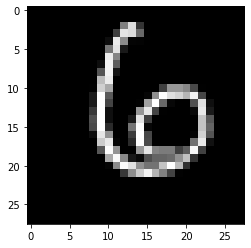

손글씨 이미지 예측값 :  [6]


In [35]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0

model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test)

plt.imshow(x_test[100], cmap="gray")
plt.show()

picks = [100]
predict = model.predict_classes(x_test[picks])
print("손글씨 이미지 예측값 : ", predict)

In [61]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

train_file = "./chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

MAX_SEQ_LEN = 15
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))

train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size).take(test_size).batch(20)

dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1

input_layer = Input(shape=(MAX_SEQ_LEN,))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)

predictions = Dense(3, activation=tf.nn.softmax)(logits)

model = Model(inputs=input_layer, outputs=predictions)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH)

loss, accuracy = model.evaluate(test_ds)
print('Accuracy: %f ' % (accuracy * 100))
print('Loss: %f' % (loss))

model.save('cnn_model.h5')

Epoch 1/5
414/414 [==============================] - 7s 16ms/step - loss: 0.9938 - accuracy: 0.4627 - val_loss: 0.5985 - val_accuracy: 0.7885
Epoch 2/5
414/414 [==============================] - 6s 15ms/step - loss: 0.5813 - accuracy: 0.7740 - val_loss: 0.2923 - val_accuracy: 0.8981
Epoch 3/5
414/414 [==============================] - 6s 15ms/step - loss: 0.3348 - accuracy: 0.8891 - val_loss: 0.1549 - val_accuracy: 0.9564
Epoch 4/5
414/414 [==============================] - 6s 15ms/step - loss: 0.2047 - accuracy: 0.9350 - val_loss: 0.0952 - val_accuracy: 0.9746
Epoch 5/5
60/60 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9873
Accuracy: 98.730963 
Loss: 0.055319


In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

train_file = "./chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

MAX_SEQ_LEN = 15
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20)

model = load_model('cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose=2)

print("단어 시퀀스 : ", corpus[1])
print("단어 인덱스 시퀀스 : ", padded_seqs[1])
print("문장 분류(정답) : ", labels[1])

picks = [1]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis=1)
print("감정 예측 점수 : ", predict)
print("감정 예측 클래스 : ", predict_class.numpy())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 15, 128)      1715072     input_7[0][0]                    
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 15, 128)      0           embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 13, 128)      49280       dropout_10[0][0]                 
____________________________________________________________________________________________

shape  x:(185, 15) / y:(185,)
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 [==============================] - 1s 2ms/step - loss: 0.2017
Epoch 2/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.1290
Epoch 3/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0685
Epoch 4/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 5/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 8/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0271
Epoch 9/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 10/1000
6/6 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 11/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 12/1000
6/6 [============================

6/6 [==============================] - 0s 2ms/step - loss: 1.0240e-05
Epoch 195/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0474e-05
Epoch 196/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.1740e-05
Epoch 197/1000
6/6 [==============================] - 0s 1ms/step - loss: 1.1459e-05
Epoch 198/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0834e-05
Epoch 199/1000
6/6 [==============================] - 0s 2ms/step - loss: 1.0521e-05


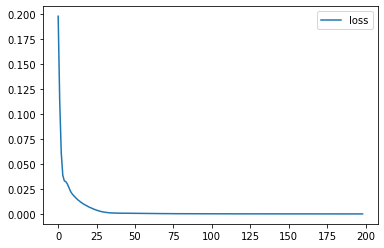

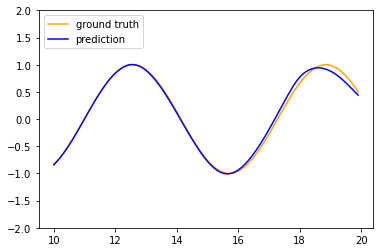

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

def split_sequence(sequence, step):
    x, y = list(), list()
    
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
            
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
        
    return np.array(x), np.array(y)

x = np.arange(start=-10, stop=10, step=0.1)
train_y = [np.sin(i) for i in x]

n_timesteps = 15
n_features = 1

train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape  x:{} / y:{}".format(train_x.shape, train_y.shape))

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

model = Sequential()
model.add(SimpleRNN(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x)

test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    predict_y = model.predict(net_input)
    test_y = np.append(test_y, predict_y)

plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="prediction", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

shape  x:(185, 15) / y:(185,)
[[ 0.54402111  0.45753589  0.36647913 ... -0.58491719 -0.66296923
  -0.7343971 ]
 [ 0.45753589  0.36647913  0.27176063 ... -0.66296923 -0.7343971
  -0.79848711]
 [ 0.36647913  0.27176063  0.17432678 ... -0.7343971  -0.79848711
  -0.85459891]
 ...
 [ 0.94073056  0.90217183  0.85459891 ...  0.02477543 -0.07515112
  -0.17432678]
 [ 0.90217183  0.85459891  0.79848711 ... -0.07515112 -0.17432678
  -0.27176063]
 [ 0.85459891  0.79848711  0.7343971  ... -0.17432678 -0.27176063
  -0.36647913]]
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 [==============================] - 2s 4ms/step - loss: 0.2505
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.2204
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1847
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1646
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.1380
Epoch 6/1000
6/6 [==============

Epoch 189/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.5628e-05
Epoch 190/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4791e-05
Epoch 191/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3965e-05
Epoch 192/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4244e-05
Epoch 193/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4520e-05
Epoch 194/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4668e-05
Epoch 195/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.4078e-05
Epoch 196/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.2351e-05
Epoch 197/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3439e-05
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3165e-05
Epoch 199/1000
6/6 [==============================] - 0s 3ms/step - loss: 1.3389e-05
Epoch 200/1000
6/6 [==============================] - 0s 3ms/step

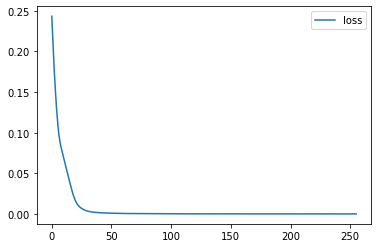

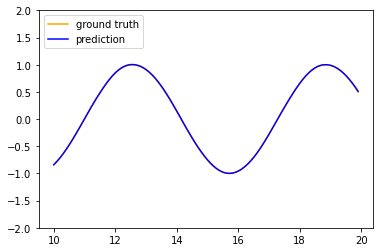

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

def split_sequence(sequence, step):
    x, y = list(), list()
    
    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
            
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
        
    return np.array(x), np.array(y)

x = np.arange(start=-10, stop=10, step=0.1)
train_y = [np.sin(i) for i in x]

n_timesteps = 15
n_features = 1

train_x, train_y = split_sequence(train_y, step=n_timesteps)
print("shape  x:{} / y:{}".format(train_x.shape, train_y.shape))
print(train_x)

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print("train_x.shape = {}".format(train_x.shape))
print("train_y.shape = {}".format(train_y.shape))

model = Sequential()
model.add(LSTM(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x)

test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i : i + n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    predict_y = model.predict(net_input)
    test_y = np.append(test_y, predict_y)

plt.plot(test_x, calc_y, label="ground truth", color="orange")
plt.plot(test_x, test_y, label="prediction", color="blue")

plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()

In [12]:
import numpy as np
from random import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed

def get_sequence(n_timesteps):
    X = np.array([random() for _ in range(n_timesteps)])
    
    limit = n_timesteps / 4.0
    
    y = np.array([0 if x < limit else 1 for x in np.cumsum(X)])
    
    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

n_units = 20
n_timesteps = 4

model = Sequential()
model.add(Bidirectional(LSTM(n_units, return_sequences=True, input_shape=(n_timesteps, 1))))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

for epoch in range(1000):
    X, y = get_sequence(n_timesteps)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)
    
X, y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
    print('실젯값 :', y[0, i], '예측값 : ', yhat[0, i])

1/1 - 3s - loss: 0.6755 - accuracy: 0.7500
1/1 - 0s - loss: 0.6711 - accuracy: 0.7500
1/1 - 0s - loss: 0.7036 - accuracy: 0.2500
1/1 - 0s - loss: 0.6546 - accuracy: 0.7500
1/1 - 0s - loss: 0.6528 - accuracy: 0.7500
1/1 - 0s - loss: 0.6586 - accuracy: 0.7500
1/1 - 0s - loss: 0.6752 - accuracy: 0.5000
1/1 - 0s - loss: 0.6557 - accuracy: 0.7500
1/1 - 0s - loss: 0.6756 - accuracy: 0.5000
1/1 - 0s - loss: 0.6752 - accuracy: 0.5000
1/1 - 0s - loss: 0.6714 - accuracy: 0.5000
1/1 - 0s - loss: 0.6824 - accuracy: 0.5000
1/1 - 0s - loss: 0.6369 - accuracy: 0.7500
1/1 - 0s - loss: 0.6990 - accuracy: 0.2500
1/1 - 0s - loss: 0.6711 - accuracy: 0.5000
1/1 - 0s - loss: 0.6442 - accuracy: 0.7500
1/1 - 0s - loss: 0.6830 - accuracy: 0.5000
1/1 - 0s - loss: 0.6351 - accuracy: 0.7500
1/1 - 0s - loss: 0.6745 - accuracy: 0.5000
1/1 - 0s - loss: 0.6460 - accuracy: 0.7500
1/1 - 0s - loss: 0.6318 - accuracy: 0.7500
1/1 - 0s - loss: 0.6621 - accuracy: 0.5000
1/1 - 0s - loss: 0.6633 - accuracy: 0.5000
1/1 - 0s - 

1/1 - 0s - loss: 0.2168 - accuracy: 1.0000
1/1 - 0s - loss: 0.1763 - accuracy: 1.0000
1/1 - 0s - loss: 0.2135 - accuracy: 1.0000
1/1 - 0s - loss: 0.2439 - accuracy: 0.7500
1/1 - 0s - loss: 0.2840 - accuracy: 0.7500
1/1 - 0s - loss: 0.1606 - accuracy: 1.0000
1/1 - 0s - loss: 0.1775 - accuracy: 1.0000
1/1 - 0s - loss: 0.1614 - accuracy: 1.0000
1/1 - 0s - loss: 0.2264 - accuracy: 0.7500
1/1 - 0s - loss: 0.1910 - accuracy: 1.0000
1/1 - 0s - loss: 0.1660 - accuracy: 1.0000
1/1 - 0s - loss: 1.6616 - accuracy: 0.2500
1/1 - 0s - loss: 0.4718 - accuracy: 0.7500
1/1 - 0s - loss: 0.2596 - accuracy: 0.7500
1/1 - 0s - loss: 0.1927 - accuracy: 1.0000
1/1 - 0s - loss: 0.2314 - accuracy: 0.7500
1/1 - 0s - loss: 0.1687 - accuracy: 1.0000
1/1 - 0s - loss: 0.2449 - accuracy: 0.7500
1/1 - 0s - loss: 0.2448 - accuracy: 0.7500
1/1 - 0s - loss: 0.2024 - accuracy: 1.0000
1/1 - 0s - loss: 0.4825 - accuracy: 0.7500
1/1 - 0s - loss: 0.1432 - accuracy: 1.0000
1/1 - 0s - loss: 0.2726 - accuracy: 0.7500
1/1 - 0s - 

1/1 - 0s - loss: 0.1298 - accuracy: 1.0000
1/1 - 0s - loss: 0.1941 - accuracy: 1.0000
1/1 - 0s - loss: 0.3141 - accuracy: 0.7500
1/1 - 0s - loss: 0.1286 - accuracy: 1.0000
1/1 - 0s - loss: 0.3452 - accuracy: 0.7500
1/1 - 0s - loss: 0.1753 - accuracy: 1.0000
1/1 - 0s - loss: 0.8762 - accuracy: 0.5000
1/1 - 0s - loss: 0.1520 - accuracy: 1.0000
1/1 - 0s - loss: 0.2778 - accuracy: 0.7500
1/1 - 0s - loss: 0.1497 - accuracy: 1.0000
1/1 - 0s - loss: 0.1357 - accuracy: 1.0000
1/1 - 0s - loss: 0.2382 - accuracy: 0.7500
1/1 - 0s - loss: 0.2239 - accuracy: 0.7500
1/1 - 0s - loss: 0.1378 - accuracy: 1.0000
1/1 - 0s - loss: 0.1669 - accuracy: 1.0000
1/1 - 0s - loss: 0.1378 - accuracy: 1.0000
1/1 - 0s - loss: 0.2921 - accuracy: 0.7500
1/1 - 0s - loss: 0.1655 - accuracy: 1.0000
1/1 - 0s - loss: 0.1197 - accuracy: 1.0000
1/1 - 0s - loss: 0.3051 - accuracy: 0.7500
1/1 - 0s - loss: 0.1896 - accuracy: 1.0000
1/1 - 0s - loss: 0.1811 - accuracy: 1.0000
1/1 - 0s - loss: 0.1970 - accuracy: 1.0000
1/1 - 0s - 

1/1 - 0s - loss: 0.1992 - accuracy: 1.0000
1/1 - 0s - loss: 0.1394 - accuracy: 1.0000
1/1 - 0s - loss: 0.1596 - accuracy: 1.0000
1/1 - 0s - loss: 0.1022 - accuracy: 1.0000
1/1 - 0s - loss: 0.1181 - accuracy: 1.0000
1/1 - 0s - loss: 0.8456 - accuracy: 0.5000
1/1 - 0s - loss: 0.1271 - accuracy: 1.0000
1/1 - 0s - loss: 0.1509 - accuracy: 1.0000
1/1 - 0s - loss: 0.1232 - accuracy: 1.0000
1/1 - 0s - loss: 0.0868 - accuracy: 1.0000
1/1 - 0s - loss: 0.2044 - accuracy: 1.0000
1/1 - 0s - loss: 1.2104 - accuracy: 0.5000
1/1 - 0s - loss: 0.1689 - accuracy: 1.0000
1/1 - 0s - loss: 0.1351 - accuracy: 1.0000
1/1 - 0s - loss: 0.1379 - accuracy: 1.0000
1/1 - 0s - loss: 0.1969 - accuracy: 1.0000
1/1 - 0s - loss: 0.2224 - accuracy: 0.7500
1/1 - 0s - loss: 0.1566 - accuracy: 1.0000
1/1 - 0s - loss: 0.4571 - accuracy: 0.7500
1/1 - 0s - loss: 0.2441 - accuracy: 0.7500
1/1 - 0s - loss: 0.1460 - accuracy: 1.0000
1/1 - 0s - loss: 0.1917 - accuracy: 1.0000
1/1 - 0s - loss: 0.1318 - accuracy: 1.0000
1/1 - 0s - 

1/1 - 0s - loss: 0.1429 - accuracy: 1.0000
1/1 - 0s - loss: 0.1720 - accuracy: 1.0000
1/1 - 0s - loss: 0.2193 - accuracy: 0.7500
1/1 - 0s - loss: 0.1481 - accuracy: 1.0000
1/1 - 0s - loss: 0.1806 - accuracy: 1.0000
1/1 - 0s - loss: 0.1252 - accuracy: 1.0000
1/1 - 0s - loss: 0.2348 - accuracy: 0.7500
1/1 - 0s - loss: 0.1727 - accuracy: 1.0000
1/1 - 0s - loss: 0.2144 - accuracy: 0.7500
1/1 - 0s - loss: 0.2735 - accuracy: 0.7500
1/1 - 0s - loss: 0.1643 - accuracy: 1.0000
1/1 - 0s - loss: 0.2157 - accuracy: 1.0000
1/1 - 0s - loss: 0.1777 - accuracy: 1.0000
1/1 - 0s - loss: 0.0958 - accuracy: 1.0000
1/1 - 0s - loss: 0.0954 - accuracy: 1.0000
1/1 - 0s - loss: 0.2085 - accuracy: 1.0000
1/1 - 0s - loss: 0.1247 - accuracy: 1.0000
1/1 - 0s - loss: 0.1752 - accuracy: 1.0000
1/1 - 0s - loss: 0.1481 - accuracy: 1.0000
1/1 - 0s - loss: 0.8728 - accuracy: 0.5000
1/1 - 0s - loss: 0.2571 - accuracy: 0.7500
1/1 - 0s - loss: 0.1388 - accuracy: 1.0000
1/1 - 0s - loss: 0.2132 - accuracy: 1.0000
1/1 - 0s - 

1/1 - 0s - loss: 0.3900 - accuracy: 0.7500
1/1 - 0s - loss: 0.0703 - accuracy: 1.0000
1/1 - 0s - loss: 0.0538 - accuracy: 1.0000
1/1 - 0s - loss: 0.1318 - accuracy: 1.0000
1/1 - 0s - loss: 0.1733 - accuracy: 1.0000
1/1 - 0s - loss: 0.0409 - accuracy: 1.0000
1/1 - 0s - loss: 0.3985 - accuracy: 0.7500
1/1 - 0s - loss: 0.1915 - accuracy: 0.7500
1/1 - 0s - loss: 0.1623 - accuracy: 1.0000
1/1 - 0s - loss: 0.1609 - accuracy: 1.0000
1/1 - 0s - loss: 0.1548 - accuracy: 1.0000
1/1 - 0s - loss: 0.1353 - accuracy: 1.0000
1/1 - 0s - loss: 0.4671 - accuracy: 0.7500
1/1 - 0s - loss: 0.1321 - accuracy: 1.0000
1/1 - 0s - loss: 0.0376 - accuracy: 1.0000
1/1 - 0s - loss: 0.1121 - accuracy: 1.0000
1/1 - 0s - loss: 0.0717 - accuracy: 1.0000
1/1 - 0s - loss: 0.1502 - accuracy: 1.0000
1/1 - 0s - loss: 0.0431 - accuracy: 1.0000
1/1 - 0s - loss: 0.0396 - accuracy: 1.0000
1/1 - 0s - loss: 0.0650 - accuracy: 1.0000
1/1 - 0s - loss: 0.5568 - accuracy: 0.7500
1/1 - 0s - loss: 0.2134 - accuracy: 0.7500
1/1 - 0s - 

In [42]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

def read_file(file_name):
    sents = []
    with open(file_name, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for idx, l in enumerate(lines):
            if l[0] == ';' and lines[idx + 1][0] == '$':
                this_sent = []
            elif l[0] == '$' and lines[idx - 1][0] == ';':
                continue
            elif l[0] == '\n':
                sents.append(this_sent)
            else:
                this_sent.append(tuple(l.split()))
    return sents

corpus = read_file('train.txt')

sentences, tags = [], []
for t in corpus:
    tagged_sentence = []
    sentence, bio_tag = [], []
    for w in t:
        tagged_sentence.append((w[1], w[3]))
        sentence.append(w[1])
        bio_tag.append(w[3])
        
    sentences.append(sentence)
    tags.append(bio_tag)
    
print("샘플 크기 : \n", len(sentences))
print("0번째 샘플 문장 시퀀스 : \n", sentences[0])
print("0번째 샘플 bio 태그 : \n", tags[0])
print("샘플 문장 시퀀스 최대 길이 : \n", max(len(l) for l in sentences))
print("샘플 문장 시퀀스 평균 길이 : \n", (sum(map(len, sentences))/len(sentences)))

sent_tokenizer = preprocessing.text.Tokenizer(oov_token='OOV')
sent_tokenizer.fit_on_texts(sentences)
tag_tokenizer = preprocessing.text.Tokenizer(lower=False)
tag_tokenizer.fit_on_texts(tags)

vocab_size = len(sent_tokenizer.word_index) + 1
tag_size = len(tag_tokenizer.word_index) + 1
print("BIO 태그 사전 크기 :", tag_size)
print("단어 사전 크기 :", vocab_size)

x_train = sent_tokenizer.texts_to_sequences(sentences)
y_train = tag_tokenizer.texts_to_sequences(tags)
print(x_train[0])
print(y_train[0])

index_to_word = sent_tokenizer.index_word
index_to_ner = tag_tokenizer.index_word
index_to_ner[0] = 'PAD'

max_len = 40
x_train = preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen=max_len)
y_train = preprocessing.sequence.pad_sequences(y_train, padding='post', maxlen=max_len)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=.2, random_state=0)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=tag_size)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=tag_size)

print("학습 샘플 시퀀스 형상 : ", x_train.shape)
print("학습 샘플 레이블 형상 : ", y_train.shape)
print("테스트 샘플 시퀀스 형상 : ", x_test.shape)
print("테스트 샘플 레이블 형상 : ", y_test.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=30, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(200, return_sequences=True, dropout=0.50, recurrent_dropout=0.25)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10)

print("평가 결과 : ", model.evaluate(x_test, y_test)[1])

def sequences_to_tag(sequences):
    result = []
    for sequence in sequences:
        temp = []
        for pred in sequence:
            pred_index = np.argmax(pred)
            temp.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(temp)
    return result

y_predicted = model.predict(x_test)
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

from seqeval.metrics import f1_score, classification_report
print(classification_report(test_tags, pred_tags))
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

word_to_index = sent_tokenizer.word_index
new_sentence = '삼성전자 출시 스마트폰 오늘 애플 도전장 내밀다.'.split()
new_x = []
for w in new_sentence:
    try:
        new_x.append(word_to_index.get(w, 1))
    except KeyError:
        new_x.append(word_to_index['OOV'])

print("새로운 유형의 시퀀스 : ", new_x)
new_padded_seqs = preprocessing.sequence.pad_sequences([new_x], padding="post", value=0, maxlen=max_len)

p = model.predict(np.array([new_padded_seqs[0]]))
p = np.argmax(p, axis=-1)

print("{:10} {:5}".format("단어", "예측된 NER"))
print("-" * 50)
for w, pred in zip(new_sentence, p[0]):
    print("{:10} {:5}".format(w, index_to_her[pred]))

샘플 크기 : 
 3555
0번째 샘플 문장 시퀀스 : 
 ['한편', ',', 'AFC', '챔피언스', '리그', 'E', '조', '에', '속하', 'ㄴ', '포항', '역시', '대회', '8강', '진출', '이', '불투명', '하', '다', '.']
0번째 샘플 bio 태그 : 
 ['O', 'O', 'O', 'O', 'O', 'B_OG', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
샘플 문장 시퀀스 최대 길이 : 
 168
샘플 문장 시퀀스 평균 길이 : 
 34.03909985935302
BIO 태그 사전 크기 : 8
단어 사전 크기 : 13834
[183, 11, 4276, 884, 162, 931, 402, 10, 2608, 7, 1516, 608, 145, 1361, 414, 4, 6347, 2, 8, 3]
[1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
학습 샘플 시퀀스 형상 :  (2844, 40)
학습 샘플 레이블 형상 :  (2844, 40, 8)
테스트 샘플 시퀀스 형상 :  (711, 40)
테스트 샘플 레이블 형상 :  (711, 40, 8)
Epoch 1/10
23/23 [==============================] - 13s 336ms/step - loss: 0.7264 - accuracy: 0.7501
Epoch 2/10
23/23 [==============================] - 8s 333ms/step - loss: 0.2621 - accuracy: 0.8879
Epoch 3/10
23/23 [==============================] - 8s 335ms/step - loss: 0.1662 - accuracy: 0.9227
Epoch 4/10
23/23 [==============================] - 8s 334ms/st

NameError: name 'index_to_her' is not defined